# AE 771 | Homework \#4 | Rocket Propulsion | Ray Taghavi
### Code Written by Henry Hunt

In [4]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
%matplotlib inline

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=300 #Resoultion of the calulations

#Editing Font Size for Plot
font = {'size'   : 18}
matplotlib.rc('font', **font)

## Recreation of Figure 3.1 from Rocket Propulsion Elements
Relationship of area ratio, pressure ratio, and temperature ratio as functions
of Mach number in a converging/diverging nozzle depicted for the subsonic and supersonic
nozzle regions. Using a ratio of specific heats k of 1.2.

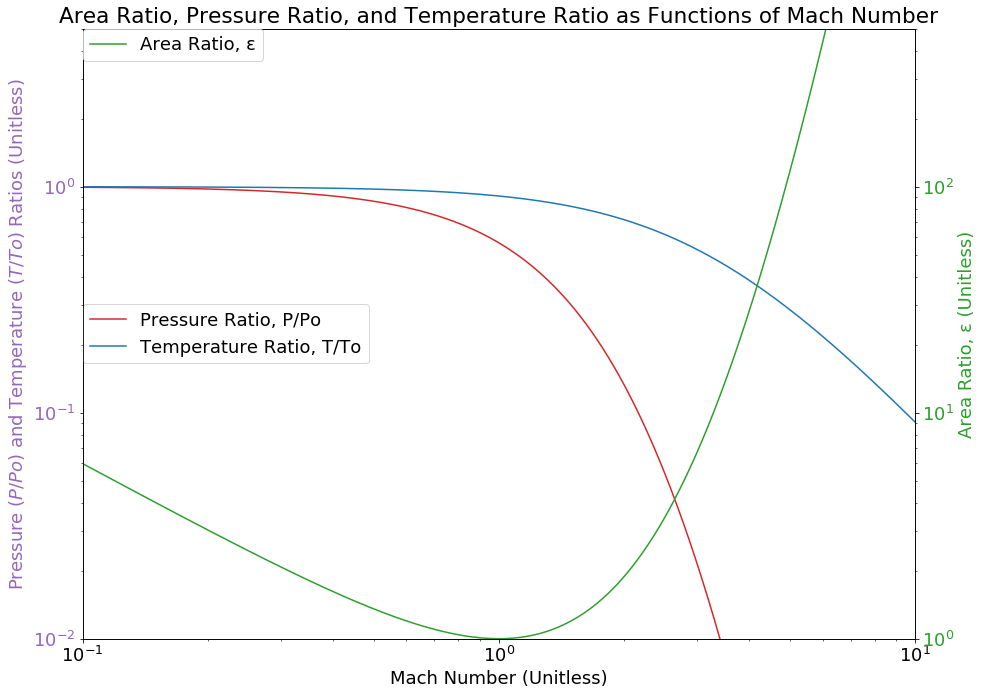

In [5]:
#Defining Variables
k=1.2                                                        #Ratio of Specific Heats | Unitless
M=np.arange(0.1,10.1,0.001)

#Primary Equations
ε=(1/M)*np.sqrt(((1+(k-1)/2*M**2)/((k+1)/2))**((k+1)/(k-1))) #Area Ratio Equation | Unitless
PoP=(1+(k-1)/2*M**2)**(k/(k-1))                              #Pressure Ratio | Unitless
ToT=(1+(k-1)/2*M**2)                                         #Pressure Ratio | Unitless
PPo=1/PoP                                                    #Inverse of Pressure Ratio | Unitless
TTo=1/ToT                                                    #Inverse of Temperature Ratio | Unitless

#Plot of Pressure and Temperature Ratios
color='tab:purple'
fig,ax1=plt.subplots()
plt.xscale('log')
plt.yscale('log')
ax1.set_xlabel('Mach Number')
ax1.set_ylabel('Pressure $(P/Po)$ and Temperature $(T/To)$ Ratios (Unitless)', color=color)
PR=ax1.plot(M,PPo,color='tab:red', label="Pressure Ratio, P/Po") #Pressure Ratio
TR=ax1.plot(M,TTo,color='tab:blue', label="Temperature Ratio, T/To") #Temperature Ratio
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.01,5])
plt.xlabel('Mach Number (Unitless)')
plt.legend(loc='center left', borderaxespad=0.)

# Plot of Area Ratios
ax2=ax1.twinx()
plt.xscale('log')
plt.yscale('log')
color='tab:green'
ax2.set_ylabel('Area Ratio, ε (Unitless)', color=color)
AR=ax2.plot(M,ε,color=color, label='Area Ratio, ε') # Area Ratio
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([1.0,500])
plt.xlim(0.10,10)
plt.title('Area Ratio, Pressure Ratio, and Temperature Ratio as Functions of Mach Number')
fig.tight_layout()
plt.legend(loc='best', borderaxespad=0.)
plt.show()

## Recreation of Figure 3.2 from Rocket Propulsion Elements
Specific impulse and exhaust velovity of an ideal rocket propulsion unit at optimum nozzle expansion and functions of the absolute chamber gas temperature T1 and the molecular mass M for several values of k and p1/p2. The recrated plot will be using a ratio of specific heats k of 1.3 and a P1/P2 of 30.

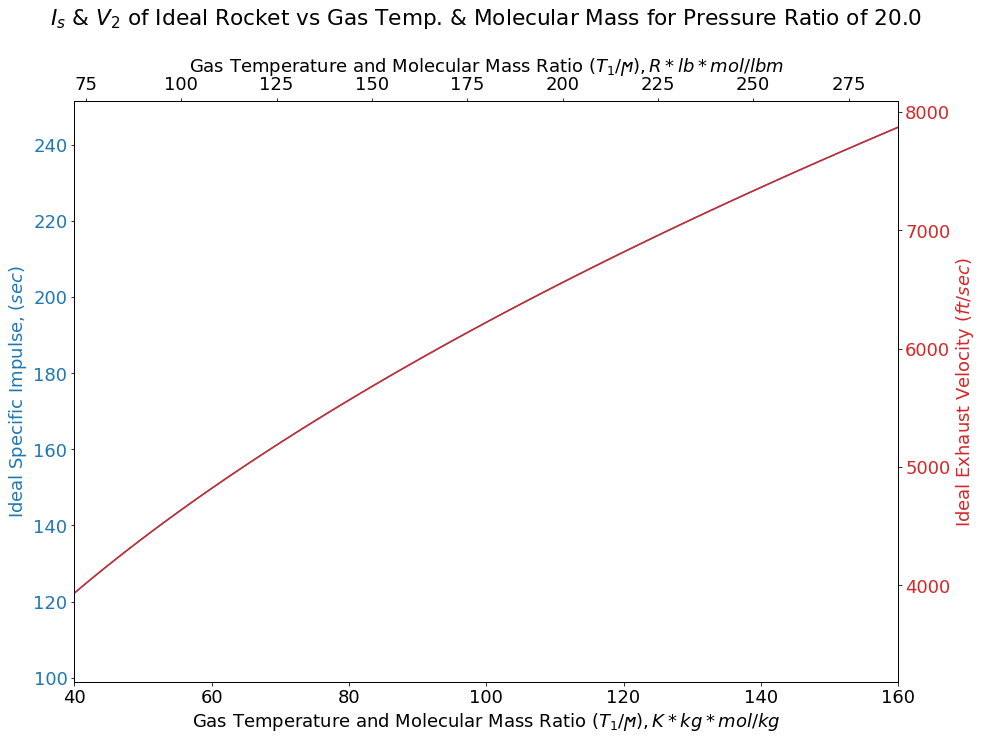

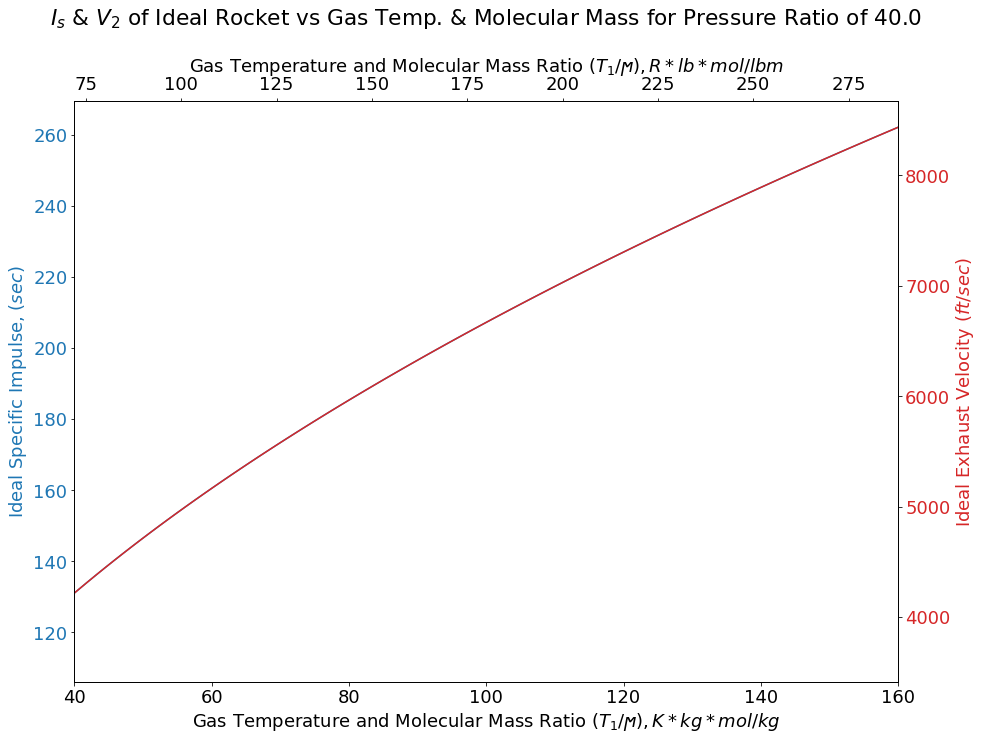

In [19]:
#Loop for multiple graphs
PressureR = [20,40] #Pressure Ratios to input | unitless
for P1_P2 in PressureR:
    #Inputs
    k=1.3 #Ratio of Specific Heats | Unitless
    R_=8.31446 #Universal Gas Constant | J*K-1*mol-1
    T1_ϻ=np.linspace(30000,160000,100) #Creating a range of temperature to molecular mass ratios
    P2_P1=1/P1_P2 #Inversing the pressure ratio
    go=9.81 #Acceleration due to gravity | m/s^2

    #Primary Equations
    V2=np.sqrt((2*k)/(k-1)*R_*T1_ϻ*(1-(P2_P1)**((k-1)/k))) #Velocity Equation (3-16)
    Isp=V2/go #Calulating Isp from the velocity relationship

    #Conversions
    V2=V2*3.28084 #Converting m/s to ft/s

    #Plotting Isp
    fig, ax1 = plt.subplots()
    color = 'tab:blue'
    ax1.set_xlabel("$(T_1/ϻ),R*lb*mol/lbm$")
    ax1.set_ylabel("Ideal Specific Impulse, $(sec)$", color=color)
    ax1.plot(T1_ϻ/1000,Isp,color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.xlabel("Gas Temperature and Molecular Mass Ratio $(T_1/ϻ),K*kg*mol/kg$")
    ax2 = ax1.twinx()  # Creating a second axis in the plot that shares the x-axis
    color = 'tab:red'
    ax2.set_ylabel("Ideal Exhaust Velocity $(ft/sec)$", color=color)
    ax2.plot(T1_ϻ/1000,V2,color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.xlim(40,160)     #Setting the range for the x-axis
    plt.title("$I_s$ & $V_2$ of Ideal Rocket vs Gas Temp. & Molecular Mass for Pressure Ratio of " + str(1/P2_P1)+"\n")
    fig.tight_layout()  #Setting a layout to ensure no clipping of variable names
    ax3 = ax1.twiny()   # Creating a second axis in the plot that shares the y-axis
    plt.xlabel("Gas Temperature and Molecular Mass Ratio $(T_1/ϻ),R*lb*mol/lbm$")
    plt.xlim(72,288)    #Creating a limit on the new x axis
    plt.show()          #Printing the plot